In [106]:
!pip install opendatasets


In [107]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/manishabhatt22/marketing-campaign-performance-dataset?resource=download")

Skipping, found downloaded files in "./marketing-campaign-performance-dataset" (use force=True to force download)


In [108]:
!pip install kagglehub pandas numpy matplotlib seaborn scikit-learn


In [109]:
import pandas as pd
df=pd.read_csv("/content/marketing-campaign-performance-dataset/marketing_campaign_dataset.csv")

In [110]:
df.head()


,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


In [111]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  object 
dtypes: float64(2), int64

,Campaign_ID,Conversion_Rate,ROI,Clicks,Impressions,Engagement_Score
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,0.080070,5.002438,549.772030,5507.301520,5.494710
std,57735.171256,0.040602,1.734488,260.019056,2596.864286,2.872581
min,1.000000,0.010000,2.000000,100.000000,1000.000000,1.000000
25%,50000.750000,0.050000,3.500000,325.000000,3266.000000,3.000000
50%,100000.500000,0.080000,5.010000,550.000000,5517.500000,5.000000
75%,150000.250000,0.120000,6.510000,775.000000,7753.000000,8.000000
max,200000.000000,0.150000,8.000000,1000.000000,10000.000000,10.000000


In [112]:
df.isnull().sum()

,0
Campaign_ID,0
Company,0
Campaign_Type,0
Target_Audience,0
Duration,0
Channel_Used,0
Conversion_Rate,0
Acquisition_Cost,0
ROI,0
Location,0


In [113]:
df.nunique()
df.columns

Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [114]:
df['Channel_Used'].value_counts()

,count
Channel_Used,
Email,33599
Google Ads,33438
YouTube,33392
Instagram,33392
Website,33360
Facebook,32819


In [115]:
df.columns


Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')

In [116]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Campaign_ID', 'Company', 'Campaign_Type', 'Target_Audience',
       'Duration', 'Channel_Used', 'Conversion_Rate', 'Acquisition_Cost',
       'ROI', 'Location', 'Language', 'Clicks', 'Impressions',
       'Engagement_Score', 'Customer_Segment', 'Date'],
      dtype='object')


In [117]:

df['Acquisition_Cost'] = (
    df['Acquisition_Cost']
    .astype(str)
    .str.replace('[\$,]', '', regex=True)
    .str.strip()
    .replace('', '0')
    .astype(float)
)


<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3854274674.py:4: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('[\$,]', '', regex=True)


In [118]:
df['ROI'] = pd.to_numeric(df['ROI'], errors='coerce')


In [119]:
df['total_spend'] = df['Acquisition_Cost']
df['Revenue'] = df['Acquisition_Cost'] * df['ROI']


In [120]:
df[['Acquisition_Cost', 'ROI', 'Revenue']].head()


,Acquisition_Cost,ROI,Revenue
0,16174.0,6.29,101734.46
1,11566.0,5.61,64885.26
2,10200.0,7.18,73236.00
3,12724.0,5.55,70618.20
4,16452.0,6.50,106938.00


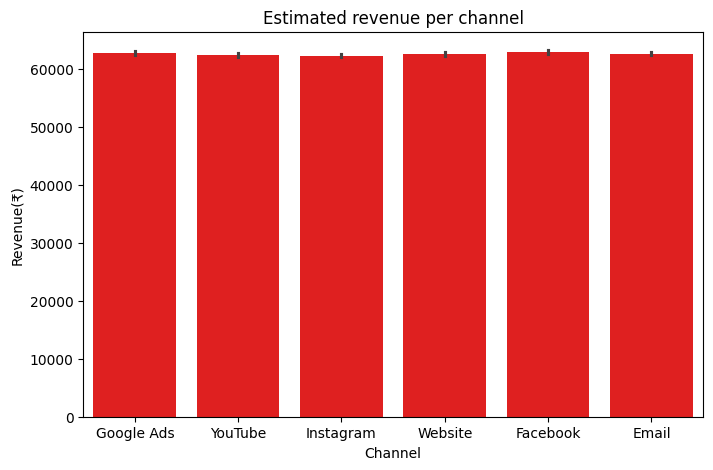

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='Channel_Used',y='Revenue',data=df,color='red')
plt.title("Estimated revenue per channel")
plt.xlabel('Channel')
plt.ylabel('Revenue(₹)')
plt.show()

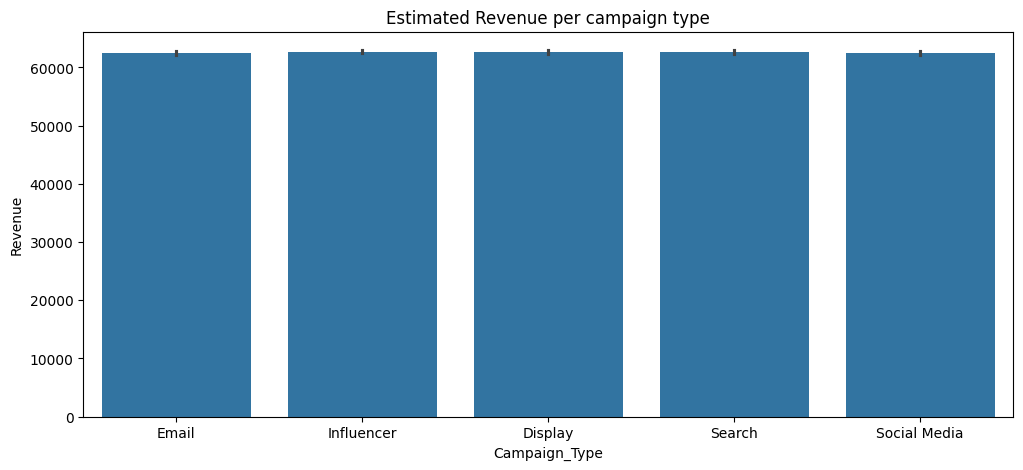

In [122]:
plt.figure(figsize=(12,5))
sns.barplot(x='Campaign_Type',y='Revenue',data=df)
plt.title('Estimated Revenue per campaign type')
plt.show()

In [123]:
df[['Acquisition_Cost', 'ROI', 'Conversion_Rate', 'Revenue']].head(10)


,Acquisition_Cost,ROI,Conversion_Rate,Revenue
0,16174.0,6.29,0.04,101734.46
1,11566.0,5.61,0.12,64885.26
2,10200.0,7.18,0.07,73236.00
3,12724.0,5.55,0.11,70618.20
4,16452.0,6.50,0.05,106938.00
5,9716.0,4.36,0.07,42361.76
6,11067.0,2.86,0.13,31651.62
7,13280.0,5.55,0.08,73704.00
8,18066.0,6.73,0.09,121584.18
9,13766.0,3.78,0.09,52035.48


In [124]:
df[['Acquisition_Cost', 'Conversion_Rate', 'Impressions', 'ROI']].head(10)


,Acquisition_Cost,Conversion_Rate,Impressions,ROI
0,16174.0,0.04,1922,6.29
1,11566.0,0.12,7523,5.61
2,10200.0,0.07,7698,7.18
3,12724.0,0.11,1820,5.55
4,16452.0,0.05,4201,6.50
5,9716.0,0.07,1643,4.36
6,11067.0,0.13,8749,2.86
7,13280.0,0.08,7854,5.55
8,18066.0,0.09,1754,6.73
9,13766.0,0.09,3856,3.78


In [125]:
df['total_spend'] = df['Acquisition_Cost']
df['Revenue'] = df['Acquisition_Cost'] * df['ROI'] # roi as conversion rate is 0


In [126]:
df['total_spend'] = df['Acquisition_Cost']

In [127]:
df['total_spend'].head()

,total_spend
0,16174.0
1,11566.0
2,10200.0
3,12724.0
4,16452.0


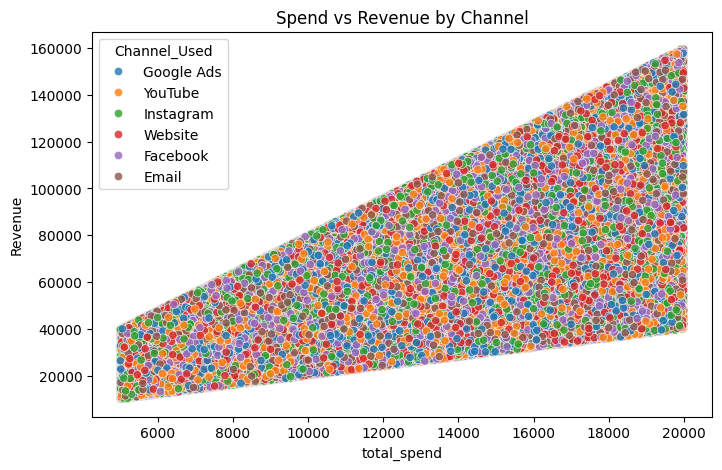

In [128]:

plt.figure(figsize=(8,5))
sns.scatterplot(x='total_spend',y='Revenue',hue='Channel_Used',data=df,alpha=0.8)
plt.title("Spend vs Revenue by Channel")
plt.show()

Numeric columns used for correlation:
 ['Campaign_ID', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'total_spend', 'Revenue']


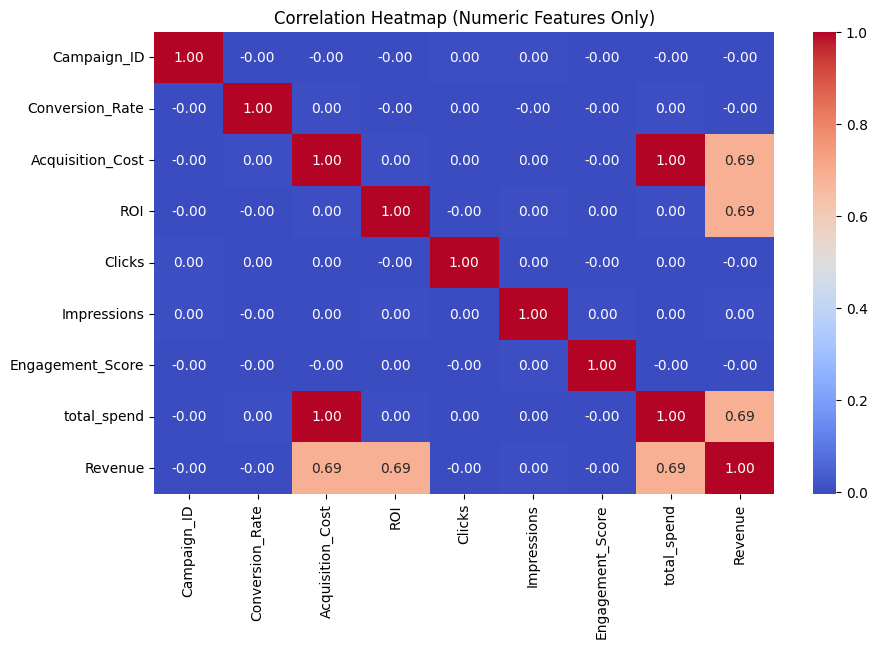

In [129]:

numeric_df = df.select_dtypes(include=['int64', 'float64'])

print("Numeric columns used for correlation:\n", numeric_df.columns.tolist())

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()


In [130]:
# data cleaning
df.dropna()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date,total_spend,Revenue
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,16174.0,6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01,16174.0,101734.46
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,11566.0,5.61,New York,German,116,7523,7,Fashionistas,2021-01-02,11566.0,64885.26
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,10200.0,7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03,10200.0,73236.00
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,12724.0,5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04,12724.0,70618.20
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,16452.0,6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05,16452.0,106938.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,199996,TechCorp,Display,All Ages,30 days,Google Ads,0.06,18365.0,2.84,Chicago,German,858,5988,1,Tech Enthusiasts,2021-12-07,18365.0,52156.60
199996,199997,DataTech Solutions,Email,Men 25-34,15 days,Facebook,0.02,8168.0,4.14,Chicago,Spanish,228,3068,7,Foodies,2021-12-08,8168.0,33815.52
199997,199998,DataTech Solutions,Social Media,Men 18-24,45 days,Website,0.05,13397.0,3.25,New York,Mandarin,723,9548,3,Tech Enthusiasts,2021-12-09,13397.0,43540.25
199998,199999,Innovate Industries,Influencer,All Ages,30 days,YouTube,0.10,18508.0,3.86,Houston,French,528,2763,1,Foodies,2021-12-10,18508.0,71440.88


In [131]:
q1 = df['total_spend'].quantile(0.25)
q3 = df['total_spend'].quantile(0.75)
iqr = q3 - q1
df = df[(df['total_spend'] >= q1 - 1.5*iqr) & (df['total_spend'] <= q3 + 1.5*iqr)]
df['Duration']=(df['Duration'].replace('days','',regex=True).astype(int))

df['Duration'] = df['Duration'].astype(int)

In [132]:
#Feature Engineering
df['CTR']=df['Clicks']/df['Impressions']
df['CPC']=df['total_spend']/df['Clicks']


In [133]:
categorical_col=df.select_dtypes(include=['object','category']).columns
print(categorical_col)

Index(['Company', 'Campaign_Type', 'Target_Audience', 'Channel_Used',
       'Location', 'Language', 'Customer_Segment', 'Date'],
      dtype='object')


In [134]:
# encodng categorical problems
df=pd.get_dummies(df,columns=['Company','Campaign_Type', 'Target_Audience', 'Channel_Used',
       'Location', 'Language', 'Customer_Segment', 'Date'],drop_first=True)

In [135]:
import numpy as np
from sklearn.preprocessing import StandardScaler
#scale numeric nos
numeric_col=df.select_dtypes(include=np.number).columns.tolist()
print(numeric_col)
scaler = StandardScaler()
nums_cols=['Campaign_ID', 'Duration', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'Revenue', 'total_spend', 'CTR', 'CPC']
df[nums_cols]=scaler.fit_transform(df[nums_cols])



['Campaign_ID', 'Duration', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'total_spend', 'Revenue', 'CTR', 'CPC']


In [136]:
df.to_csv("clean_marketing_data.csv", index=False)
print('Cleaned data')

Cleaned data


In [137]:
# roi metrices
df['revenue_per_spend']=df['Revenue']/df['total_spend'] #efficiency
df['cost_per_impressions']=df['total_spend']/df['Impressions']
df['revenue_per_click'] = df['Revenue'] / df['Clicks']

In [138]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(0, inplace=True)


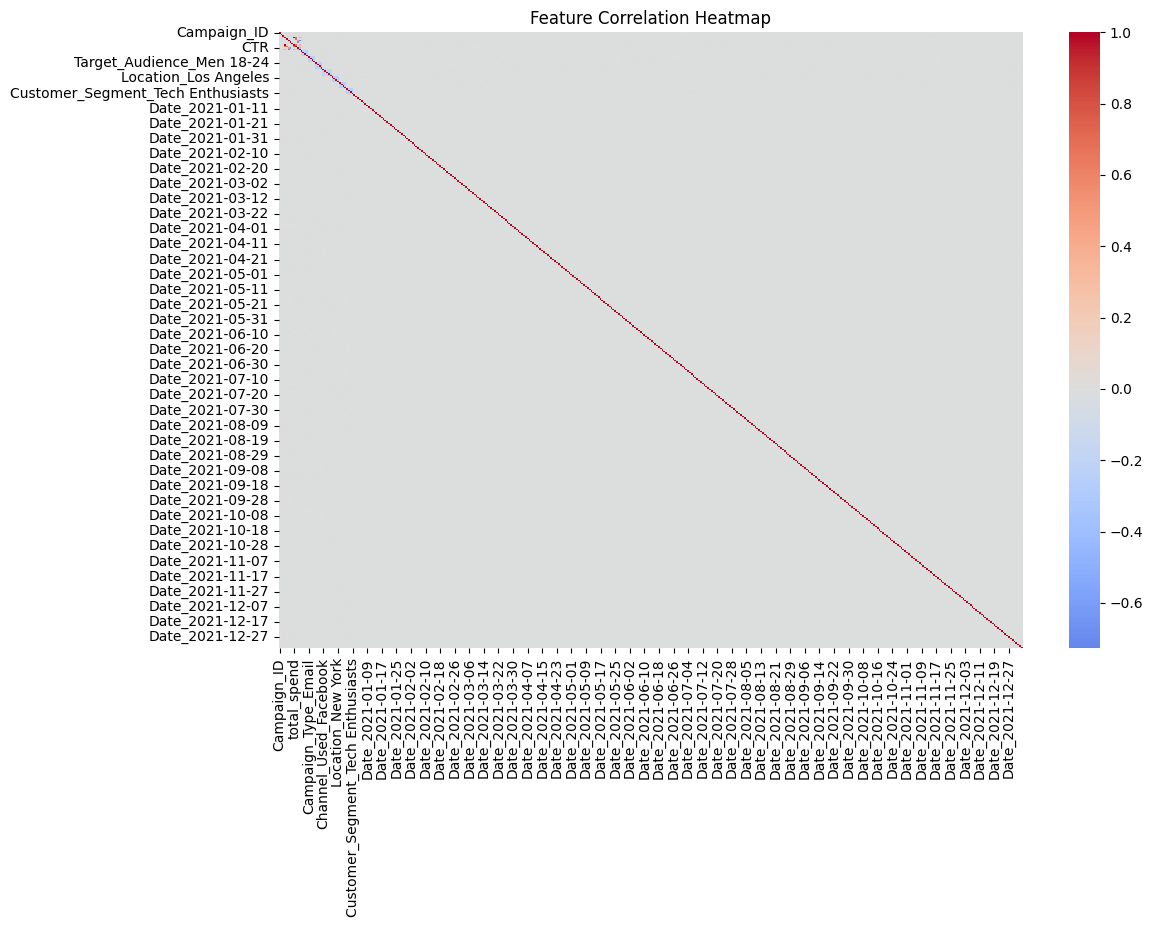

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()


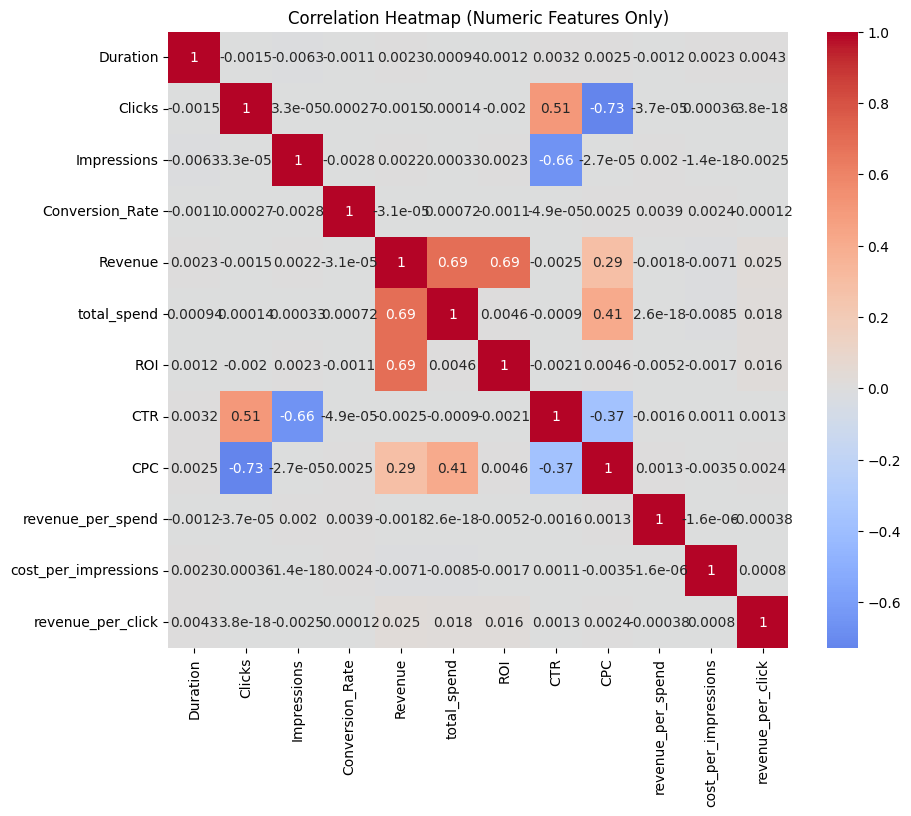

In [140]:
num_cols = ['Duration', 'Clicks', 'Impressions', 'Conversion_Rate',
            'Revenue', 'total_spend', 'ROI', 'CTR', 'CPC',
            'revenue_per_spend', 'cost_per_impressions', 'revenue_per_click']

plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numeric Features Only)')
plt.show()


In [141]:
from sklearn.model_selection import train_test_split

X = numeric_df.drop('Revenue', axis=1)
y = numeric_df['Revenue']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [142]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [143]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("R² Score:", round(r2, 3))
print("Mean Absolute Error:", round(mae, 2))



R² Score: 0.943
Mean Absolute Error: 5644.46


In [144]:
import pandas as pd

importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print(importance)



            Feature   Coefficient
3               ROI  12497.218840
1   Conversion_Rate    123.719536
7       total_spend      2.503528
2  Acquisition_Cost      2.503528
5       Impressions      0.006253
0       Campaign_ID      0.000240
4            Clicks     -0.016769
6  Engagement_Score     -3.618788


In [145]:
sample = X.mean().copy()  # average campaign
print("Original average total_spend:", sample['total_spend'])

# +20% increase in ad spend
sample['total_spend'] *= 1.2

predicted_revenue = model.predict(pd.DataFrame([sample], columns=X.columns))
print("Predicted Revenue after +20% spend:", round(predicted_revenue[0], 2))



Original average total_spend: 12504.39304
Predicted Revenue after +20% spend: 68855.83


In [146]:
sample_before = X.mean().copy()
rev_before = model.predict(pd.DataFrame([sample_before], columns=X.columns))[0]

sample_after = sample_before.copy()
sample_after['total_spend'] *= 1.2
rev_after = model.predict(pd.DataFrame([sample_after], columns=X.columns))[0]

print("Original Revenue:", round(rev_before, 2))
print("After +20% Spend:", round(rev_after, 2))
print("Revenue Growth (%):", round(((rev_after - rev_before) / rev_before) * 100, 2))



Original Revenue: 62594.81
After +20% Spend: 68855.83
Revenue Growth (%): 10.0


In [147]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))


Random Forest R²: 0.9999941488890692
Random Forest MAE: 56.71171872749934


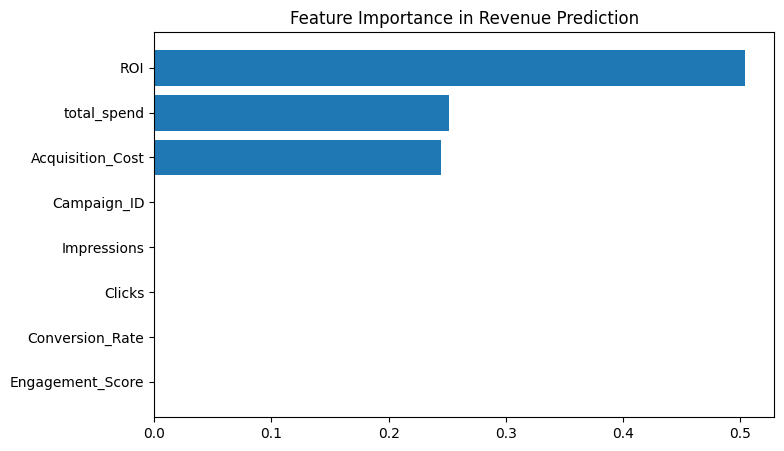

In [148]:
import pandas as pd
import matplotlib.pyplot as plt

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(importance['Feature'], importance['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance in Revenue Prediction")
plt.show()


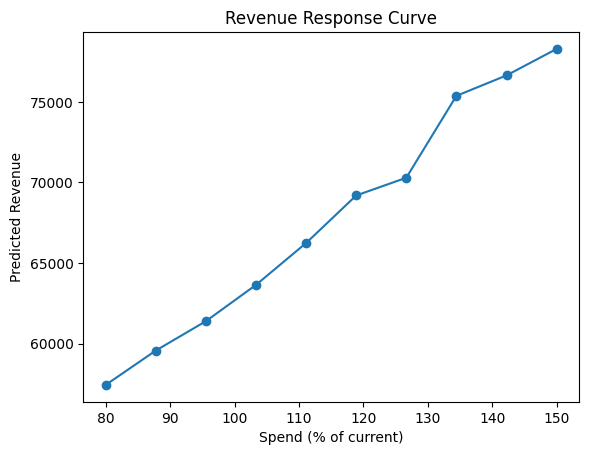

In [149]:
spends = np.linspace(0.8, 1.5, 10)  # 80% to 150% of current spend
revenues = []

for s in spends:
    sample = X.mean().copy()
    sample['total_spend'] *= s
    rev = rf.predict(pd.DataFrame([sample], columns=X.columns))[0]
    revenues.append(rev)

plt.plot(spends * 100, revenues, marker='o')
plt.xlabel("Spend (% of current)")
plt.ylabel("Predicted Revenue")
plt.title("Revenue Response Curve")
plt.show()


In [150]:
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

In [151]:

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=200, random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    results.append([name, round(r2, 3), round(mae, 2)])

results_df = pd.DataFrame(results, columns=['Model', 'R² Score', 'MAE'])
print(results_df)


               Model  R² Score      MAE
0  Linear Regression     0.943  5644.46
1      Random Forest     1.000    56.71
2      Decision Tree     1.000   189.17
3            XGBoost     1.000   210.08


/tmp/ipython-input-4191943455.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=results_df, x='Model', y='R² Score', palette='coolwarm')


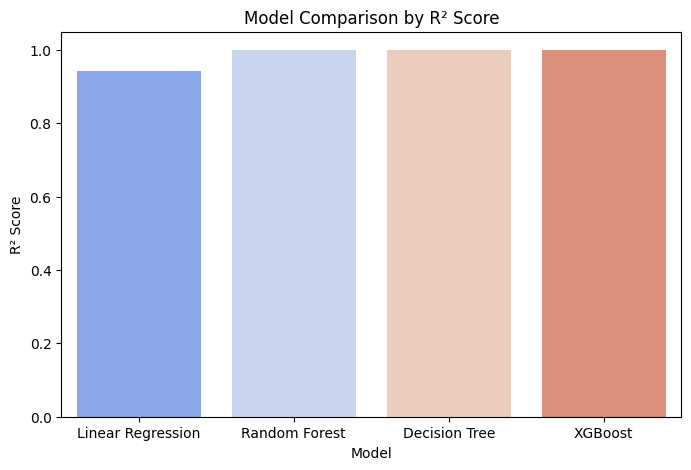

In [152]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.barplot(data=results_df, x='Model', y='R² Score', palette='coolwarm')
plt.title("Model Comparison by R² Score")
plt.show()


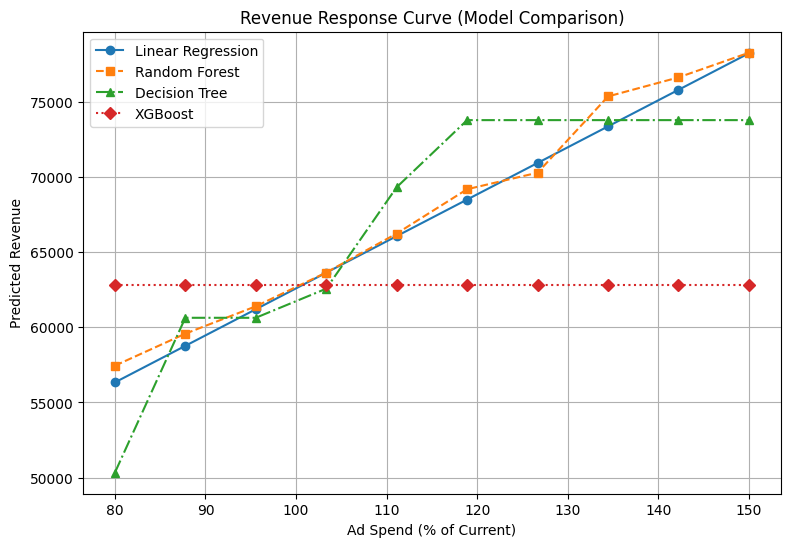

In [153]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
xgb = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

spends = np.linspace(0.8, 1.5, 10)

revenues_lr, revenues_rf, revenues_dt, revenues_xgb = [], [], [], []

for s in spends:
    sample = X.mean().copy()
    sample['total_spend'] *= s

    lr_rev = lr.predict(pd.DataFrame([sample], columns=X.columns))[0]
    rf_rev = rf.predict(pd.DataFrame([sample], columns=X.columns))[0]
    dt_rev = dt.predict(pd.DataFrame([sample], columns=X.columns))[0]
    xgb_rev = xgb.predict(pd.DataFrame([sample], columns=X.columns))[0]

    revenues_lr.append(lr_rev)
    revenues_rf.append(rf_rev)
    revenues_dt.append(dt_rev)
    revenues_xgb.append(xgb_rev)

plt.figure(figsize=(9,6))
plt.plot(spends*100, revenues_lr, marker='o', linestyle='-', label='Linear Regression')
plt.plot(spends*100, revenues_rf, marker='s', linestyle='--', label='Random Forest')
plt.plot(spends*100, revenues_dt, marker='^', linestyle='-.', label='Decision Tree')
plt.plot(spends*100, revenues_xgb, marker='D', linestyle=':', label='XGBoost')

plt.xlabel("Ad Spend (% of Current)")
plt.ylabel("Predicted Revenue")
plt.title("Revenue Response Curve (Model Comparison)")
plt.legend()
plt.grid(True)
plt.show()


In [154]:
comparison_df = pd.DataFrame({
    "Spend (%)": spends*100,
    "Linear Regression": revenues_lr,
    "Decision Tree": revenues_dt,
    "Random Forest": revenues_rf,
    "XGBoost": revenues_xgb
})

print(comparison_df)
comparison_df.to_csv("model_revenue_comparison.csv", index=False)


    Spend (%)  Linear Regression  Decision Tree  Random Forest       XGBoost
0   80.000000       56333.789063       50322.90    57448.10035  62818.148438
1   87.777778       58768.629705       60636.58    59579.04105  62818.148438
2   95.555556       61203.470346       60636.58    61399.61745  62818.148438
3  103.333333       63638.310987       62573.70    63650.50810  62818.148438
4  111.111111       66073.151629       69328.49    66245.61935  62818.148438
5  118.888889       68507.992270       73795.00    69194.78475  62818.148438
6  126.666667       70942.832912       73795.00    70294.81120  62818.148438
7  134.444444       73377.673553       73795.00    75372.46980  62818.148438
8  142.222222       75812.514195       73795.00    76639.33020  62818.148438
9  150.000000       78247.354836       73795.00    78281.73625  62818.148438


In [155]:
comparison_df.to_csv("model_revenue_comparison.csv", index=False)
print("✅ Saved as model_revenue_comparison.csv")


✅ Saved as model_revenue_comparison.csv


In [161]:
import joblib

joblib.dump(rf, "ad_spend_optimizer.pkl")
print("✅ Model saved as ad_spend_optimizer.pkl")
from google.colab import files
files.download("ad_spend_optimizer.pkl")



✅ Model saved as ad_spend_optimizer.pkl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>